Loading dataset...
Converting data types...
Setting date as index...
Dropping rows with NaN values...
Date range in the original DataFrame:
2015-10-08 13:00:00 2023-07-24 23:00:00
Plotting Close Price...


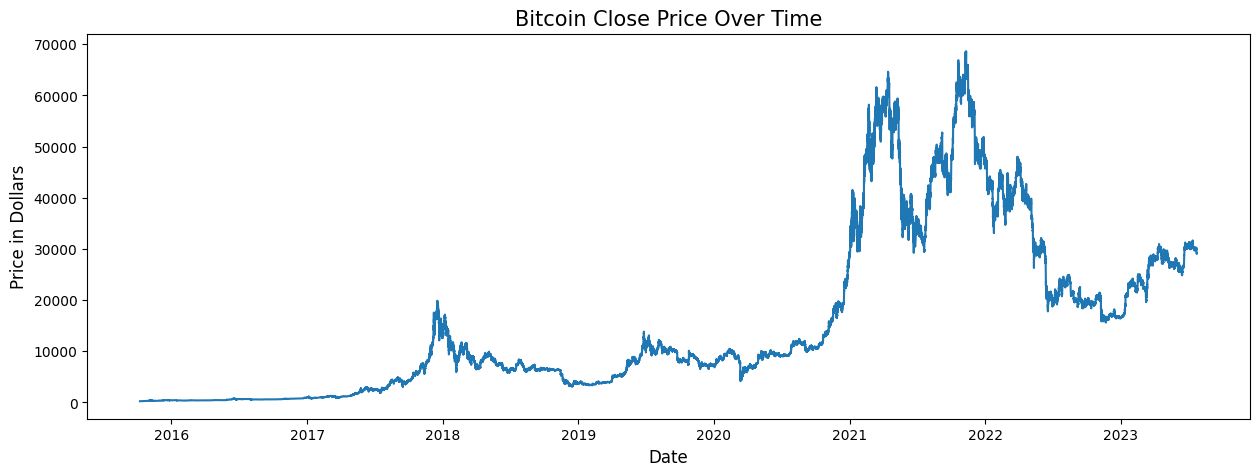

Plotting Volume...


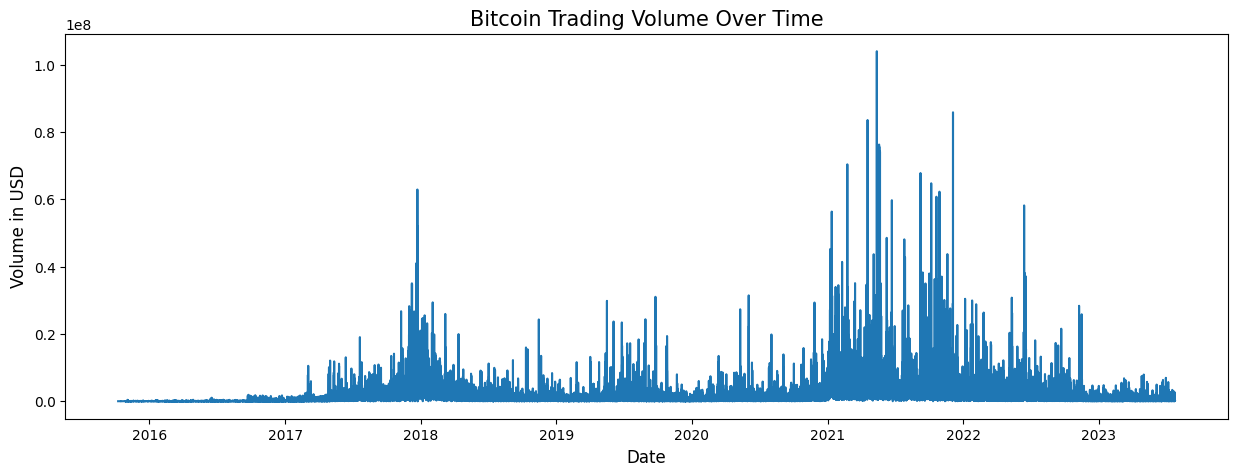

Calculating and plotting moving averages...


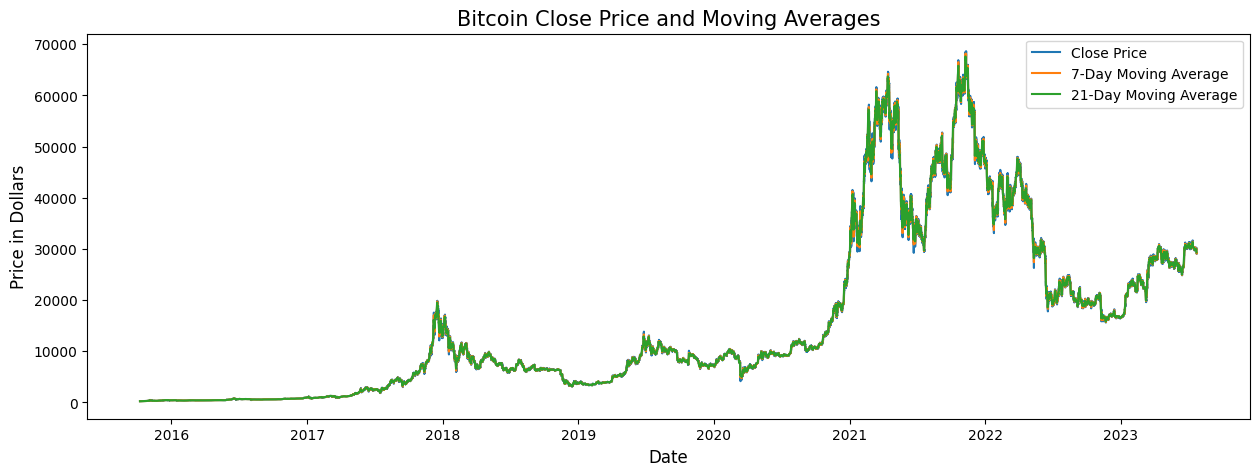

Calculating and plotting momentum...


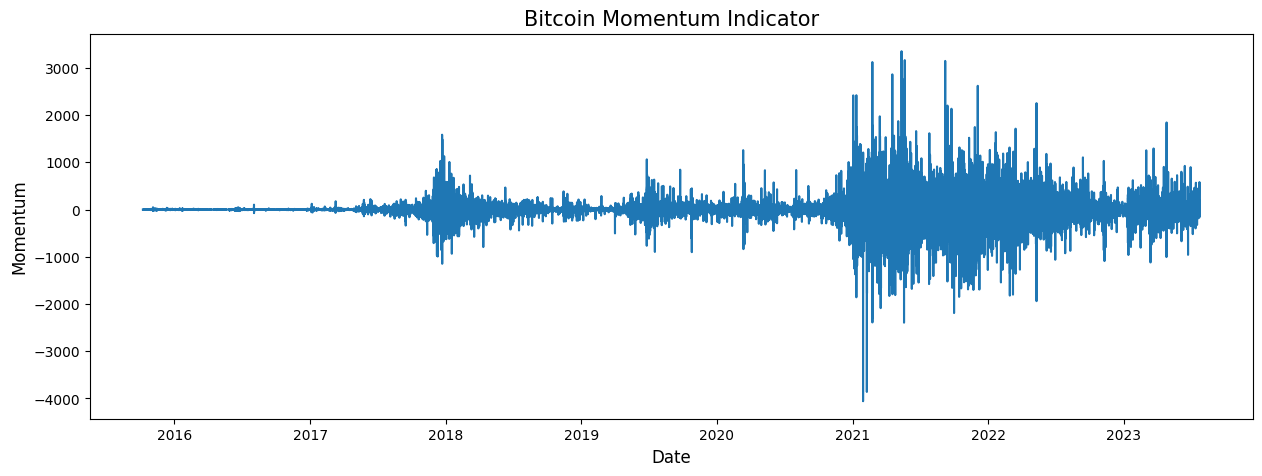

Calculating and plotting volume moving averages...


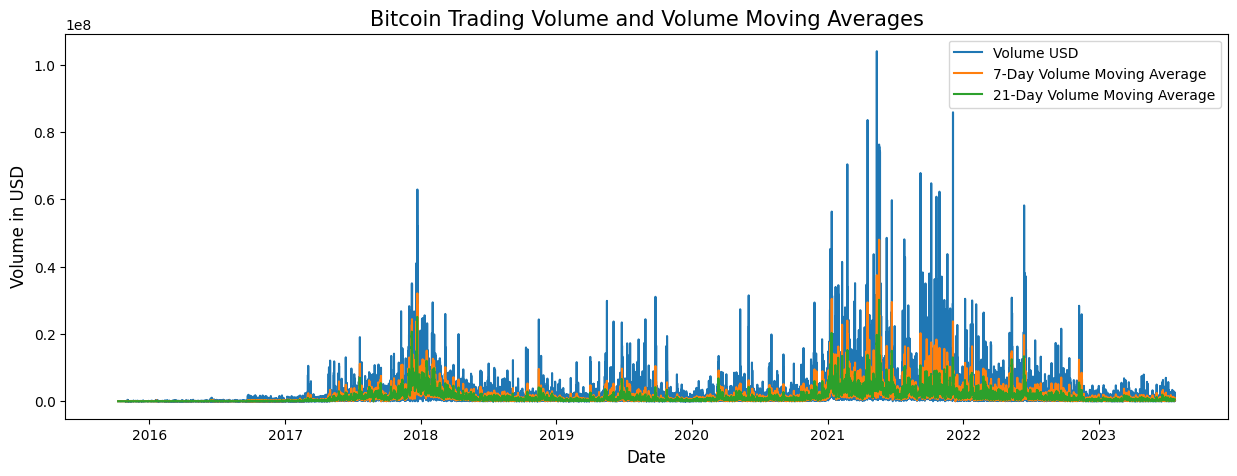

Selecting a suitable date range for regression...
Filtering data from 2023-01-01 00:00:00
Shape of the filtered DataFrame:
(4920, 13)
Mean Squared Error: 19185.92124581891
R-squared: 0.9986677241180868
Accuracy: 99.87%


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Loading dataset
print("Loading dataset...")
file_path = 'Gemini_BTCUSD (1).csv'
df = pd.read_csv(file_path, skiprows=1)

# Convert date to datetime
print("Converting data types...")
df['date'] = pd.to_datetime(df['date'])
df['close'] = pd.to_numeric(df['close'], errors='coerce')
df['open'] = pd.to_numeric(df['open'], errors='coerce')
df['high'] = pd.to_numeric(df['high'], errors='coerce')
df['low'] = pd.to_numeric(df['low'], errors='coerce')
df['Volume BTC'] = pd.to_numeric(df['Volume BTC'], errors='coerce')
df['Volume USD'] = pd.to_numeric(df['Volume USD'], errors='coerce')

# Set date as index
print("Setting date as index...")
df.set_index('date', inplace=True)

# Drop rows with NaN
print("Dropping rows with NaN values...")
df.dropna(inplace=True)

# Checking range
print("Date range in the original DataFrame:")
print(df.index.min(), df.index.max())

# Exploratory Data Analysis(EDA)
print("Plotting Close Price...")
plt.figure(figsize=(15, 5))
plt.plot(df['close'])
plt.title('Bitcoin Close Price Over Time', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in Dollars', fontsize=12)
plt.show()

print("Plotting Volume...")
plt.figure(figsize=(15, 5))
plt.plot(df['Volume USD'])
plt.title('Bitcoin Trading Volume Over Time', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume in USD', fontsize=12)
plt.show()

# Calculate and plot moving averages
print("Calculating and plotting moving averages...")
df['MA7'] = df['close'].rolling(window=7).mean()
df['MA21'] = df['close'].rolling(window=21).mean()
plt.figure(figsize=(15, 5))
plt.plot(df['close'], label='Close Price')
plt.plot(df['MA7'], label='7-Day Moving Average')
plt.plot(df['MA21'], label='21-Day Moving Average')
plt.title('Bitcoin Close Price and Moving Averages', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in Dollars', fontsize=12)
plt.legend()
plt.show()

# Calculate and plot momentum
print("Calculating and plotting momentum...")
df['Momentum'] = df['close'] - df['close'].shift(1)
plt.figure(figsize=(15, 5))
plt.plot(df['Momentum'])
plt.title('Bitcoin Momentum Indicator', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Momentum', fontsize=12)
plt.show()

# Calculate and plot volume moving averages
print("Calculating and plotting volume moving averages...")
df['Volume MA7'] = df['Volume USD'].rolling(window=7).mean()
df['Volume MA21'] = df['Volume USD'].rolling(window=21).mean()
plt.figure(figsize=(15, 5))
plt.plot(df['Volume USD'], label='Volume USD')
plt.plot(df['Volume MA7'], label='7-Day Volume Moving Average')
plt.plot(df['Volume MA21'], label='21-Day Volume Moving Average')
plt.title('Bitcoin Trading Volume and Volume Moving Averages', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume in USD', fontsize=12)
plt.legend()
plt.show()

# Selecting Range for Regression
print("Selecting a suitable date range for regression...")
start_date = pd.to_datetime('2023-01-01 00:00:00')
print(f"Filtering data from {start_date}")
regression_df = df[df.index >= start_date].copy()  # Create a copy to avoid SettingWithCopyWarning
print("Shape of the filtered DataFrame:")
print(regression_df.shape)

# feature Engineering
if not regression_df.empty:
    regression_df.dropna(subset=['MA7', 'MA21', 'Momentum', 'Volume MA7', 'Volume MA21'], inplace=True)

    # Preparing data for regression
    features = ['MA7', 'MA21', 'Momentum', 'Volume MA7', 'Volume MA21']
    target = 'close'

    # Checking whether all feature are present
    missing_features = [feature for feature in features if feature not in regression_df.columns]
    if missing_features:
        print(f"Missing features: {missing_features}")
    else:
        X = regression_df[features].copy()  # Create a copy to avoid SettingWithCopyWarning
        y = regression_df[target].copy()    # Create a copy to avoid SettingWithCopyWarning

        # Ensure that NaN values are not presernt
        X.dropna(inplace=True)
        y = y[X.index]

        # Split the data into training and testing sets

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train a regression model

        model = LinearRegression()
        model.fit(X_train, y_train)

        # Predict and evaluate the model

        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        accuracy = r2 * 100  # Convert R-squared to percentage
        print(f'Mean Squared Error: {mse}')
        print(f'R-squared: {r2}')
        print(f'Accuracy: {accuracy:.2f}%')
else:
    print("The filtered DataFrame is empty. Please check the date range.")
